# TASK 1


**Problem Statement**   ::
As part of a survey aimed at understanding students' career aspirations, you've gathered
responses from students about their career dreams, but there's a hitch—loads of spelling
mistakes! For instance, "DOCTOR" is misspelled as "DACTAR" or "DOCTER," and
"ENGINEER" as "ENJINEAR."
To clean up the data and get accurate insights, you need a smart algorithm to fix these spelling
goof-ups. Your task is to develop an algorithm that can automatically correct these and makes
your form submission free from any spelling mistakes

With the corrected data, plot the career aspirations of students using a bar chart. Each bar
represents the frequency of each career choice. You can use matplotlib or any plotting libraries

1. Doctor
2. Lawyer
3. Teacher
4. Engineer
5. Accountant
6. Nurse
7. Police
8. Architect
9. Dentist
10. Pharmacist

#### ALGORITHMS USED : 

There are some algorithms like cosine similarity of word vectors, jaccard similarity , levenshtein distance , n gram similarity etc.
to measure the degree of similarity between two words . 
But all of them has some of their pros and cons . 

**For example**:
1. While measuring angle between word vector magnitude of vector will not account for which its accuracy decreases even on                       some of easy obvious test.

 2. In jaccard similarity while calculating number of elements in intersection and Union the order of letters barely plays role in comparison of words.Ex- by jaccard similarity word "doctor" and "codrot" are totally similar which actually is not.

3. In levenshtein distance algorithm its accuray is quite good but for each comparison its make large number of calls for                        calculating  minimum number of edits (in recursuive mode) and use large auxiliary space in iterative form. But even then                      it is not 100% accurate
           

**IDEA OF APPROACH**  ::

Each of them has some pros and cons so our idea is to fuse each of algorithm and make a new algorithm which will have cummulative effect of each of these algorithm . so that even one algo fails on one particular word other algorithms balances it and give overall better output on large data set.

##### First Individual function will be made then will be fused in one function to give final output

In [1]:
###

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### CONVERTING STRING TO VECTOR OF 26 DIMENSION

In [3]:
# 26 dimesion vector given number of letter occuring in the word 
# index 0 tells number of A, index 1 tells number of B ....index 25 tell number of Z occuring in word like that.

def string_to_vector(str):
    vector= np.zeros(26)
    ourstring= str.upper()
    # convert word in upper case to use their ASCII value to relate it to index
    for char in ourstring:
        vector[ord(char.upper())- ord('A')]=vector[ord(char.upper())- ord('A')]+1
        
    return vector
s="Kharagpur"
vec1= string_to_vector(s)
vec1


array([2., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       2., 0., 0., 1., 0., 0., 0., 0., 0.])

#### Calculating modulus of formed vector function

In [4]:
def mod(l):
    # Initialize variable 'a'
    a = 0
    
    # Calculate sum of squares of elements in the list
    for item in l:
        a += item * item
        
    # Calculate square root of the sum of squares
    b = a ** 0.5
    
    # Return the result
    return b

# Example usage
root = mod([1, 1, 1])
print("Square root of sum of squares:", root)

Square root of sum of squares: 1.7320508075688772


##### Calculating cosine of angle between vectors 

In [5]:
def cos_similarity(v1,v2):
    res= np.dot(v1,v2)/(mod(v1)*mod(v2)) # using property of dot product a.b= |a||b|cos0
    return res
# example
e1=[1,1,1,1,1,1]
e2=[0,1,0,1,1,1]
print(  cos_similarity(e1,e2) )


0.8164965809277261


In [6]:
career_list=["Doctor","lawyer","Teacher","Engineer","Accountant","Nurse","Police","Architect","Dentist","Pharmacist"]

In [7]:
vec_career_list=[] # this contains 10 vector of 26 dimension of actuall spelling of careers options
for item in career_list:
    vec_career_list.append(string_to_vector(item))

In [8]:
vec_career_list

[array([0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 1., 0., 1., 0.]),
 array([1., 0., 1., 0., 2., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 3., 0., 1., 0., 1., 0., 0., 0., 0., 2., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([2., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 1., 0., 0.,
        0., 0., 2., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        1., 1., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 2., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 2., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 

In [9]:
#    Now making a fuction f1 which uses cos similairty, take input as a string and list of words to be checked with and returns 
#    cos0 value at their respective index

In [10]:
def f1(test_word,target_list_of_words): # f1 is our first function of fusion algotithm (use cosine similarity)
    reslist=np.zeros(10)
    i=0
    for item in target_list_of_words:
        reslist[i]=( cos_similarity(string_to_vector(item),string_to_vector(test_word)) )
        i=i+1
    return reslist

In [11]:
# check function1
f1("Doctor",career_list)
# we can see it gives 1 at index 0 which is position of Doctor and respective cos0 value at other index

array([1.        , 0.14433757, 0.35355339, 0.08838835, 0.5       ,
       0.15811388, 0.4330127 , 0.49029034, 0.35355339, 0.30618622])

#### JACCARD COEFFICIENT

##### In this we calculate the number of letters in the intersection of letter of words and number of letter in the union

Here also we use vector approch to calculate it.

for calculating size of intersection/ size of union we use jaccard mathematical approach.

ex- set1={1,2,3,4} set2={0,3,5,2} assume each position of set tell some value related to a particular property

mathematical jaccard formula says . jaccard coeff= ∑ min (Xk ,Yk)/∑ max (Xk ,Yk)  , xk,yk refers to corresponding elemnts of individual property

In [12]:
def jaccard(a,b):  # a and b are two strings
    v1=string_to_vector(a) # converting the string to vector
    v2=string_to_vector(b)
    inter=0 # initialise size of intersection and union
    union=0
    for i in range(0,26):
        if (v1[i]>=v2[i]): # if v1[i]>v2[i] them add v1 to union and v2 intersection
            inter= inter+v2[i]
            union=union +v1[i]
        else:             # if v1[i]<v2[i] them add v2 to union and v1 intersection
            inter=inter+v1[i]
            union=union +v2[i]
            
    if(union != 0):
        return (inter/union)

In [13]:
#    Now making a fuction f2 which uses jaccard similairty, take input as a string and list of words to be checked with and returns 
#    jaccard coefficient value at their respective index

In [14]:
def f2 (test_word,target_list_of_words):   # f2 is our second function of fusion algotithm (use jaccard similarity)
   
    reslist=np.zeros(10)
    j=0
    for i in target_list_of_words:
        reslist[j]= jaccard(test_word.upper(),i.upper())
        j=j+1
    return reslist 
    

In [15]:
f2("dactar",career_list)  # checking f2

array([0.5       , 0.2       , 0.44444444, 0.07692308, 0.33333333,
       0.1       , 0.09090909, 0.36363636, 0.18181818, 0.45454545])

### Levenshtein Distance

In this we calculate the the minimum number of edits required to convert one word to other 
by opertion insert, delete and replace

In [16]:
# this is iterative approch to calculate minimum distance using 2d array which give minimum number of edits
def leven_distance( word1, word2):
        dp = [[0] * (len(word1) + 1) for _ in range(len(word2) + 1)]
        
        # Initializing the first column
        for i in range(len(dp)):
            dp[i][0] = i
        
        # Initializing the first row
        for i in range(len(dp[0])):
            dp[0][i] = i
        
        # Dynamic programming calculation
        for row in range(1, len(dp)):
            for col in range(1, len(dp[0])):
                if word1[col - 1] == word2[row - 1]:
                    dp[row][col] = dp[row - 1][col - 1]
                else:
                    dp[row][col] = min(dp[row - 1][col - 1], dp[row - 1][col], dp[row][col - 1]) + 1
        
        return dp[-1][-1]

#    As this we give the number of edits which will be more than one
#   so we will normalise it also in final function f3 by dividing it by maximum number of edits which is sum of lenth of both the strings

In [17]:
#    Now making a fuction f3 which uses levenshtein algo, take input as a string and list of words to be checked with and returns 
#    normalised levenstein distance value at their respective index

In [36]:
def f3(test_word,target_list_of_words):
   
    reslist=np.zeros(10)
    
    j=0
    for i in target_list_of_words:
        
        reslist[j]= 1-(leven_distance(test_word.upper(),i.upper())/max(len(test_word),len(i) ))
        j=j+1
    return reslist 

In [40]:
# check

f3("polce",career_list)

array([0.16666667, 0.16666667, 0.28571429, 0.125     , 0.1       ,
       0.2       , 0.83333333, 0.11111111, 0.        , 0.2       ])

# Lets fuse the algorithms

In [20]:
def Fuzzymatch(test_word,target_list_of_words):
     ourstr=test_word.upper()
     a=1  #a,b,c are the coeffecients to give weightage to these three algorithms  
     b=1
     c=1
     array_1= f1(ourstr,target_list_of_words)   # three array given by those f1,f2,f3
     array_2= f2(ourstr,target_list_of_words)
     array_3= f3(ourstr,target_list_of_words)
     result_array= ( (a*array_1)+(b*array_2)+(c*array_3) )*(1/(a+b+c)) # adding them and dividing it by (a+b+c) to normalise
     j=0
     max=0
     res_idx=-1
     for j in range(0,10): # after getting the final array with respective probabilities we chose the index with the maximum probability
         if(result_array[j]>max):
             max= result_array[j]
             res_idx=j
     return res_idx 

In [21]:
Fuzzymatch("doctar",career_list) # give output 0 i.e position of doctor

0

In [22]:
# for printing the word
def correctword(string,targetlist):
    return targetlist[ Fuzzymatch(string,targetlist) ]

In [23]:
# check
correctword("poleci",career_list)

'Police'

In [24]:
# Read the Excel file
xls_file = pd.read_excel("TaskData.xlsx")

# Write the DataFrame to a CSV file
xls_file.to_csv("kdagdata.csv", index=False)
data=pd.read_csv("kdagdata.csv")

In [25]:
data

,cokter
0,dentiists
1,Enginir
2,PoLICE
3,engneiear
4,DOcTRO
...,...
1400,enginir
1401,aCcountANT
1402,accountant
1403,POlIcE


In [26]:
# cokter need to be inside that so
datalist= np.array(np.insert(data.to_numpy(),0,"cokter")) 

In [27]:
datalist

array(['cokter', 'dentiists', 'Enginir', ..., 'accountant', 'POlIcE',
       'enjineer'], dtype=object)

In [28]:
type(datalist)

numpy.ndarray

In [29]:
datalist.shape

(1406,)

# Final result

In [39]:
result_list=np.zeros(10) # contains number of students at each career
p=0  # p runs from 0 to 1405(no.of data) just too see how much data is processed
import time
t1= time.time()
for i in datalist:
    j=Fuzzymatch(i,career_list)
    result_list[j]=result_list[j]+1
    print(p)
    p=p+1
t2= time.time()
print(t2-t1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [31]:
# correcting origional data

for i in range(1406):
     datalist[i]=correctword(datalist[i],career_list)

In [32]:
datalist    # corrected list

array(['Doctor', 'Dentist', 'Engineer', ..., 'Accountant', 'Police',
       'Engineer'], dtype=object)

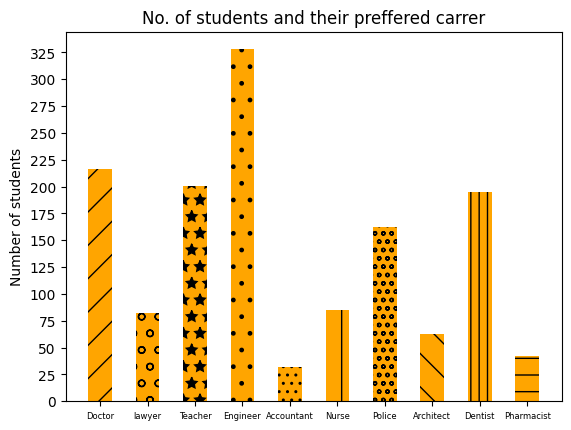

In [33]:
bar=plt.bar(career_list,result_list,width=0.5,color="orange")
plt.xticks(fontsize=6)
plt.yticks(np.array(np.arange(0,350,25)))
design=["/","o","*",".","..","|","oo","\\","||","-"]
k=0
for des in design:
    bar[k].set_hatch(des)
    k=k+1
plt.title("No. of students and their preffered carrer")
plt.ylabel("Number of students")
plt.show()

In [34]:
result_list

array([216.,  82., 201., 328.,  32.,  85., 162.,  63., 195.,  42.])

In [35]:
for i,j in zip(career_list,result_list):
    print(i,":  ",j,"\n")

Doctor :   216.0 

lawyer :   82.0 

Teacher :   201.0 

Engineer :   328.0 

Accountant :   32.0 

Nurse :   85.0 

Police :   162.0 

Architect :   63.0 

Dentist :   195.0 

Pharmacist :   42.0 



# THANKYOU...